In [1]:
%load_ext autoreload
%autoreload 2


In [1]:
import pandas as pd
import json
import geojson
from copy import deepcopy


In [107]:
processed_geojson_path = "../../data/centroid-merged-updated-thailand-provinces.geojson"

mock_data_path = "../../data/mock_data.xlsx"

In [108]:
import geojson
with open(processed_geojson_path, 'r') as file:
    processed_geojson = geojson.load(file)

In [109]:
import plotly.figure_factory as ff

import pandas as pd

df_sample = pd.read_excel(mock_data_path)

df_sample

,id,name,created_at,updated_at,value
0,810000,กระบี่,2023-12-19 06:45:04.431773 +00:00,2023-12-19 06:45:04.437579 +00:00,12
1,100000,กรุงเทพมหานคร,2023-12-19 06:45:04.431773 +00:00,2023-12-19 06:45:04.437579 +00:00,3
2,710000,กาญจนบุรี,2023-12-19 06:45:04.431773 +00:00,2023-12-19 06:45:04.437579 +00:00,2
3,460000,กาฬสินธุ์,2023-12-19 06:45:04.431773 +00:00,2023-12-19 06:45:04.437579 +00:00,1
4,620000,กำแพงเพชร,2023-12-19 06:45:04.431773 +00:00,2023-12-19 06:45:04.437579 +00:00,2
...,...,...,...,...,...
72,110000,สมุทรปราการ,2023-12-19 06:45:04.431773 +00:00,2023-12-19 06:45:04.437579 +00:00,41
73,750000,สมุทรสงคราม,2023-12-19 06:45:04.431773 +00:00,2023-12-19 06:45:04.437579 +00:00,34
74,740000,สมุทรสาคร,2023-12-19 06:45:04.431773 +00:00,2023-12-19 06:45:04.437579 +00:00,1
75,270000,สระแก้ว,2023-12-19 06:45:04.431773 +00:00,2023-12-19 06:45:04.437579 +00:00,53


In [51]:
import geopandas as gpd

data = gpd.read_file(processed_geojson_path)
data

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,REGION_ID,VALUE,geometry
0,228,THA,Thailand,370000,Amnat Charoen,Changwat,Province,จังหวัดอำนาจเจริ,None,5,7,"POLYGON ((104.98066 16.27747, 105.01581 16.244..."
1,228,THA,Thailand,150000,Ang Thong,Changwat,Province,จังหวัดอ่างทอง,None,4,97,"POLYGON ((100.46979 14.71473, 100.49653 14.697..."
2,228,THA,Thailand,100000,Bangkok Metropolis,Changwat,Province,จังหวัดเชียงใหม่,Bangkok|Krung Thep|Krung Thep Maha Nakhon|Phra...,1,3,"POLYGON ((100.91515 13.94426, 100.9074 13.8598..."
3,228,THA,Thailand,380000,Bueng Kan,Changwat,Province,บึงกาฬ,None,5,567,"POLYGON ((104.19147 18.0205, 104.14795 18.0120..."
4,228,THA,Thailand,310000,Buri Ram,Changwat,Province,จังหวัดบุรีรัมย์,Buri Rum,5,24,"POLYGON ((103.11443 15.47934, 103.10193 15.427..."
...,...,...,...,...,...,...,...,...,...,...,...,...
72,228,THA,Thailand,410000,Udon Thani,Changwat,Province,จังหวัดอุดรธานี,None,5,42,"POLYGON ((103.40276 17.90267, 103.40843 17.847..."
73,228,THA,Thailand,610000,Uthai Thani,Changwat,Province,จังหวัดอุทัยธานี,None,2,4,"POLYGON ((100.10334 15.41659, 100.0882 15.4068..."
74,228,THA,Thailand,530000,Uttaradit,Changwat,Province,จังหวัดอุตรดิตถ์,None,2,78,"POLYGON ((100.99017 17.74162, 100.97836 17.713..."
75,228,THA,Thailand,950000,Yala,Changwat,Province,จังหวัดยะลา,None,6,96,"POLYGON ((101.59311 6.5654, 101.60851 6.54492,..."


In [59]:
import pyproj
data.to_crs(pyproj.CRS.from_epsg(4326), inplace=True)

data["geometry"].centroid

/var/folders/zh/2nbplj4d25x_8955b0rlvsvr0000gn/T/ipykernel_14210/3577090696.py:4: UserWarning:

Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.




0     POINT (104.74096 15.88985)
1     POINT (100.35009 14.62061)
2     POINT (100.62412 13.77209)
3     POINT (103.71318 18.14528)
4     POINT (102.95851 14.81924)
                 ...            
72    POINT (102.86706 17.42425)
73     POINT (99.47735 15.34853)
74    POINT (100.51937 17.74811)
75     POINT (101.23054 6.19392)
76    POINT (104.34058 15.89461)
Length: 77, dtype: geometry

In [25]:
import plotly.express as px

fig = px.choropleth(data, geojson=data['geometry'], locations=states.index, color=states.varon)
fig.show()

In [52]:
import pandas as pd
import plotly.express as px
import geopandas as gpd
import pyproj

# reading in the shapefile
map_df = gpd.read_file(processed_geojson_path)
map_df.to_crs(pyproj.CRS.from_epsg(4326), inplace=True)

df = pd.read_excel(mock_data_path)
# join the geodataframe with the cleaned up csv dataframe
merged = map_df.set_index('ID_1').join(df.set_index('id'))
#merged = merged.reset_index()
merged.head()

fig = px.choropleth(merged, geojson=merged.geometry, locations=merged.index, color="REGION_ID")
fig.update_geos(fitbounds="locations", visible=False)

fig.show()

In [110]:
import pandas as pd
import plotly.express as px
import geopandas as gpd
import pyproj

# reading in the shapefile
map_df = gpd.read_file(processed_geojson_path)
map_df.to_crs(pyproj.CRS.from_epsg(4326), inplace=True)
# map_df["centroid"] = map_df["geometry"].centroid

df = pd.read_excel(mock_data_path)
# join the geodataframe with the cleaned up csv dataframe
merged = map_df.set_index('ID_1').join(df.set_index('id'))
merged = merged.set_index('NAME_1')
#merged = merged.reset_index()
merged.head()



# px.scatter_geo(merged, locations="centroid",
#                      color="NAME_1", # which column to use to set the color of markers
#                      hover_name="NAME_1", # column added to hover information
#                      size="value", # size of markers
#                      # projection="natural earth"
#                )
fig = px.choropleth(merged, 
                    geojson=merged.geometry, 
                    locations=merged.index,
                    hover_name="name",
                    color="REGION_ID"
                    )
fig.update_geos(fitbounds="locations", visible=False)

data = merged[["name", "value"]]
fig2 = px.scatter_geo(merged,
                    lat=merged.centroid_y,
                    lon=merged.centroid_x,
                    hover_name="name",
                      labels="name",
                    size="value",
)

fig.add_trace(fig2.data[0])

fig.show()


In [70]:
merged.head()


,ID_0,ISO,NAME_0,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,REGION_ID,VALUE,geometry,centroid,created_at,updated_at,value
name,,,,,,,,,,,,,,,
อำนาจเจริญ,228,THA,Thailand,Amnat Charoen,Changwat,Province,จังหวัดอำนาจเจริ,None,5,7,"POLYGON ((104.98066 16.27747, 105.01581 16.244...",POINT (104.74096 15.88985),2023-12-19 06:45:04.431773 +00:00,2023-12-19 06:45:04.437579 +00:00,7
อ่างทอง,228,THA,Thailand,Ang Thong,Changwat,Province,จังหวัดอ่างทอง,None,4,97,"POLYGON ((100.46979 14.71473, 100.49653 14.697...",POINT (100.35009 14.62061),2023-12-19 06:45:04.431773 +00:00,2023-12-19 06:45:04.437579 +00:00,97
กรุงเทพมหานคร,228,THA,Thailand,Bangkok Metropolis,Changwat,Province,จังหวัดเชียงใหม่,Bangkok|Krung Thep|Krung Thep Maha Nakhon|Phra...,1,3,"POLYGON ((100.91515 13.94426, 100.9074 13.8598...",POINT (100.62412 13.77209),2023-12-19 06:45:04.431773 +00:00,2023-12-19 06:45:04.437579 +00:00,3
บึงกาฬ,228,THA,Thailand,Bueng Kan,Changwat,Province,บึงกาฬ,None,5,567,"POLYGON ((104.19147 18.0205, 104.14795 18.0120...",POINT (103.71318 18.14528),2023-12-19 06:45:04.431773 +00:00,2023-12-19 06:45:04.437579 +00:00,567
บุรีรัมย์,228,THA,Thailand,Buri Ram,Changwat,Province,จังหวัดบุรีรัมย์,Buri Rum,5,24,"POLYGON ((103.11443 15.47934, 103.10193 15.427...",POINT (102.95851 14.81924),2023-12-19 06:45:04.431773 +00:00,2023-12-19 06:45:04.437579 +00:00,24


In [56]:
import pandas as pd
import plotly.express as px
import geopandas as gpd
import pyproj

# reading in the shapefile
map_df = gpd.read_file(processed_geojson_path)
map_df.to_crs(pyproj.CRS.from_epsg(4326), inplace=True)

df = pd.read_excel(mock_data_path)
# join the geodataframe with the cleaned up csv dataframe
merged = map_df.set_index('ID_1').join(df.set_index('id'))
#merged = merged.reset_index()
merged.head()

fig = px.choropleth(merged, geojson=merged.geometry, locations=merged.index, color="VALUE")
fig.update_geos(fitbounds="locations", visible=False)

px.scatter_geo(merged, locations="geometry",
                     color="REGION_ID", # which column to use to set the color of markers
                     hover_name="NAME_1", # column added to hover information
                     size="value", # size of markers
                     projection="natural earth")

fig.show()

[]

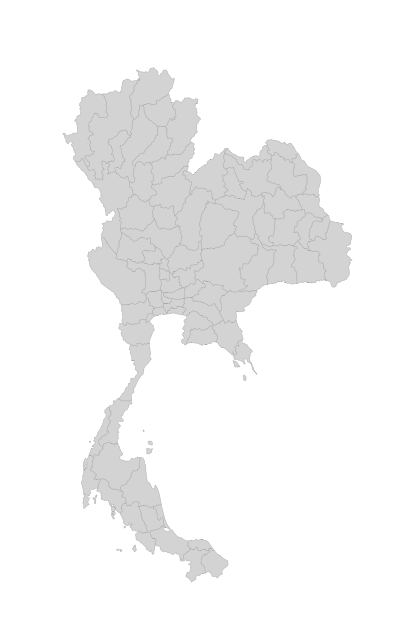

In [42]:
import geoplot
import geoplot.crs as gcrs

geopd_df = gpd.read_file(processed_geojson_path)

ax = geoplot.polyplot(
    geopd_df,
    projection=gcrs.AlbersEqualArea(),
    edgecolor='darkgrey',
    facecolor='lightgrey',
    linewidth=.3,
    figsize=(12, 8)
)

ax.plot()

In [38]:
gdf.set_crs("EPSG:32630").to_crs("EPSG:4326")

,geometry,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,REGION_ID
0,"POLYGON ((-7.4878 0.00015, -7.4878 0.00015, -7...",228,THA,Thailand,370000,Amnat Charoen,Changwat,Province,จังหวัดอำนาจเจริ,None,5
1,"POLYGON ((-7.48784 0.00013, -7.48784 0.00013, ...",228,THA,Thailand,150000,Ang Thong,Changwat,Province,จังหวัดอ่างทอง,None,4
2,"POLYGON ((-7.48784 0.00013, -7.48784 0.00013, ...",228,THA,Thailand,100000,Bangkok Metropolis,Changwat,Province,จังหวัดเชียงใหม่,Bangkok|Krung Thep|Krung Thep Maha Nakhon|Phra...,1
3,"POLYGON ((-7.48781 0.00016, -7.48781 0.00016, ...",228,THA,Thailand,380000,Bueng Kan,Changwat,Province,บึงกาฬ,None,5
4,"POLYGON ((-7.48782 0.00014, -7.48782 0.00014, ...",228,THA,Thailand,310000,Buri Ram,Changwat,Province,จังหวัดบุรีรัมย์,Buri Rum,5
...,...,...,...,...,...,...,...,...,...,...,...
72,"POLYGON ((-7.48782 0.00016, -7.48782 0.00016, ...",228,THA,Thailand,410000,Udon Thani,Changwat,Province,จังหวัดอุดรธานี,None,5
73,"POLYGON ((-7.48785 0.00014, -7.48785 0.00014, ...",228,THA,Thailand,610000,Uthai Thani,Changwat,Province,จังหวัดอุทัยธานี,None,2
74,"POLYGON ((-7.48784 0.00016, -7.48784 0.00016, ...",228,THA,Thailand,530000,Uttaradit,Changwat,Province,จังหวัดอุตรดิตถ์,None,2
75,"POLYGON ((-7.48783 0.00006, -7.48783 0.00006, ...",228,THA,Thailand,950000,Yala,Changwat,Province,จังหวัดยะลา,None,6


In [40]:
gdf = gpd.GeoDataFrame.from_features(requests.get("https://pastebin.com/raw/GwUsskWs").json()["features"])
gdf

,geometry,toponimo_i,link,varon,mujer,totalpobl,hogares,viviendasp,viv_part_h
0,"POLYGON ((4006564.958 6440712.482, 4006546.497...",323031,300210101,367.0,450.0,817.0,261.0,284.0,254.0
1,"POLYGON ((4006564.958 6440712.482, 4006652.454...",323032,300210102,449.0,498.0,947.0,291.0,315.0,279.0
2,"POLYGON ((4007420.908 6440504.513, 4008187.115...",290101,300210103,64.0,68.0,132.0,44.0,76.0,40.0
3,"POLYGON ((4006506.708 6440469.584, 4006592.422...",323033,300210104,425.0,514.0,939.0,313.0,361.0,304.0
4,"POLYGON ((4006256.995 6440531.731, 4006341.735...",323035,300210105,263.0,333.0,596.0,217.0,229.0,195.0
5,"POLYGON ((4006018.188 6440591.26, 4006092.996 ...",323036,300210106,312.0,386.0,698.0,272.0,288.0,251.0
6,"POLYGON ((4005930.489 6440703.147, 4005930.906...",323037,300210107,450.0,475.0,925.0,283.0,305.0,275.0
7,"POLYGON ((4005371.05 6440228.49, 4005440.544 6...",323038,300210108,678.0,683.0,1361.0,351.0,372.0,342.0
8,"POLYGON ((4005860.339 6439949.538, 4005919.29 ...",323039,300210109,239.0,287.0,526.0,180.0,206.0,178.0
9,"POLYGON ((4006177.555 6440206.125, 4006262.295...",323040,300210110,178.0,223.0,401.0,150.0,169.0,149.0


In [13]:
df = px.data.gapminder().query("year==2007")
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32
...,...,...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.249,85262356,2441.576404,VNM,704
1667,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798,PSE,275
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906,YEM,887
1691,Zambia,Africa,2007,42.384,11746035,1271.211593,ZMB,894


In [23]:
processed_geojson

{"features": [{"geometry": {"coordinates": [[[104.980659, 16.27747], [105.015808, 16.244608], [105.013176, 16.19586], [105.043159, 16.10743], [105.062759, 16.095539], [105.046127, 16.093081], [105.00544, 16.015072], [105.011459, 15.962691], [104.979126, 15.935171], [104.984833, 15.899951], [104.965729, 15.858881], [104.961433, 15.786899], [104.911858, 15.761672], [104.908913, 15.725821], [104.893486, 15.68705], [104.89711, 15.652271], [104.927147, 15.640422], [104.928841, 15.60102], [104.888206, 15.5728], [104.870056, 15.570671], [104.798927, 15.59295], [104.780212, 15.625931], [104.716393, 15.65873], [104.622871, 15.685362], [104.614197, 15.661652], [104.618988, 15.622802], [104.586761, 15.605811], [104.58815, 15.56521], [104.549461, 15.54063], [104.51239, 15.56144], [104.508583, 15.582579], [104.466682, 15.585401], [104.441673, 15.641361], [104.44381, 15.697751], [104.426056, 15.70676], [104.436172, 15.754071], [104.430183, 15.77306], [104.450119, 15.83067], [104.461761, 15.84037], [